# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Clustering




**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner 


<hr style="height:2pt">

### Homework 2 is due February 20th

In [7]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- This is individual homework - No collaboration/Groups
- Problem 1 + Problem 2 = 75 points ; Problem 3 = 25 points
- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from gap_statistic import OptimalK
#from sklearn.datasets.samples_generator import make_blobs


<hr style="height:2pt">

<div class="theme">*Handy* Algorithms </div>


    
In this assignment, you will be working with data collected from a motion capture camera system. The system was used to record 14 different users performing 5 distinct hand postures with markers attached to a left-handed glove. A set of markers on the back of the glove was used to establish a local coordinate system for the hand, and 8 additional markers were attached to the thumb and fingers of the glove. A total of 24 features were collected based on observations from the camera system. Two other variables in the dataset were the ID of the user and the posture that the user made.

These data have been preprocessed, including transformation to the local coordinate system of the record, removal of outliers, and removal of missing data.

The dataset `postures_clean.csv` contains 38,943 rows and 26 columns. Each row corresponds to a single frame as captured by the camera system. The data are represented in the following manner:

`Class (type: Integer). The hand posture of the given observation, with`

`1 = Fist (with thumb out)`

`2 = Stop (hand flat)`

`3 = Point1 (point with index finger)`

`4 = Point2 (point with index and middle fingers)`

`5 = Grab (fingers curled as if to grab)`

`User (type: Integer). The ID of the user that contributed the record.`

`X0, Y0, Z0, X1, Y1, Z1,..., X7, Y7, Z7 (type: Real). The x-coordinate, y-coordinate, and z-coordinate of the eight unlabeled marker positions.`


Start by reading the dataset into a pandas data frame.

In [10]:
#First read in dataset
df0 = pd.read_csv("postures_clean.csv")   ##raw dataset

df0.head()
df0.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,...,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000
mean,3.533986,8.149501,51.392252,93.748418,-18.956761,48.644293,97.228337,-16.921813,46.432265,97.351512,...,-18.446645,45.392642,93.295433,-19.125065,45.201114,90.839851,-19.920157,44.463433,88.463343,-20.368719
std,1.332452,4.587195,34.070402,40.145995,34.976568,34.922596,38.076977,34.671422,36.395332,37.470755,...,35.597032,37.104094,39.746619,35.602273,37.556616,40.227409,34.827888,38.378395,40.503378,33.943957
min,1.000000,0.000000,-108.552738,-67.157904,-120.284665,-111.685241,-65.758453,-120.290858,-99.917453,-64.830342,...,-157.199089,-99.014815,-64.282645,-118.328399,-100.084275,-67.283707,-153.449813,-108.605639,-64.972157,-113.733105
25%,2.000000,5.000000,28.169252,74.946345,-43.598807,22.574182,79.747406,-41.210343,17.617698,81.302159,...,-45.169035,15.849890,76.376404,-46.363837,15.132050,68.915784,-46.547792,13.081363,63.541846,-45.676522
50%,4.000000,9.000000,54.596564,93.966079,-15.041397,52.960933,96.690641,-12.046916,51.184849,97.222693,...,-14.823751,50.160084,97.040377,-16.010237,49.968499,95.562441,-17.101080,49.601058,93.796334,-19.428819
75%,5.000000,12.000000,77.390834,130.932659,7.998678,75.560564,131.729311,9.065824,74.435194,130.794462,...,9.382799,73.761617,126.844621,9.031498,74.558859,123.069653,7.767866,75.721811,119.188963,6.591351
max,5.000000,14.000000,160.850926,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,119.237203,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907,189.221529,169.127359,117.815967


In [11]:
##make a copy of the data
df0.dtypes
df=df0.copy()

<div class='exercise'>Problem 1: Clustering with k-means </div>

(a) After appropriate pre-processing (but not scaling) run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to the number of users, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster14` to your data frame.

In [12]:
#Fit kmeans to un-scaled df
from sklearn.cluster import KMeans
ms_kmeans = KMeans(n_clusters=14, init='random', n_init=46, random_state=109).fit(df)
print(ms_kmeans)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=14, n_init=46, n_jobs=None, precompute_distances='auto',
       random_state=109, tol=0.0001, verbose=0)


In [13]:
# add cluster lable back to dataset
df["Cluster14"] =(ms_kmeans.labels_) +1
df.head()
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,Cluster14
count,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,...,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000
mean,3.533986,8.149501,51.392252,93.748418,-18.956761,48.644293,97.228337,-16.921813,46.432265,97.351512,...,45.392642,93.295433,-19.125065,45.201114,90.839851,-19.920157,44.463433,88.463343,-20.368719,7.122949
std,1.332452,4.587195,34.070402,40.145995,34.976568,34.922596,38.076977,34.671422,36.395332,37.470755,...,37.104094,39.746619,35.602273,37.556616,40.227409,34.827888,38.378395,40.503378,33.943957,4.292169
min,1.000000,0.000000,-108.552738,-67.157904,-120.284665,-111.685241,-65.758453,-120.290858,-99.917453,-64.830342,...,-99.014815,-64.282645,-118.328399,-100.084275,-67.283707,-153.449813,-108.605639,-64.972157,-113.733105,1.000000
25%,2.000000,5.000000,28.169252,74.946345,-43.598807,22.574182,79.747406,-41.210343,17.617698,81.302159,...,15.849890,76.376404,-46.363837,15.132050,68.915784,-46.547792,13.081363,63.541846,-45.676522,3.000000
50%,4.000000,9.000000,54.596564,93.966079,-15.041397,52.960933,96.690641,-12.046916,51.184849,97.222693,...,50.160084,97.040377,-16.010237,49.968499,95.562441,-17.101080,49.601058,93.796334,-19.428819,7.000000
75%,5.000000,12.000000,77.390834,130.932659,7.998678,75.560564,131.729311,9.065824,74.435194,130.794462,...,73.761617,126.844621,9.031498,74.558859,123.069653,7.767866,75.721811,119.188963,6.591351,11.000000
max,5.000000,14.000000,160.850926,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907,189.221529,169.127359,117.815967,14.000000


(b) Use the function below to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 14 clusters seem to make sense?

In [14]:
from sklearn.decomposition import PCA

def plot_clusters(full_data, group_col, scaling_mode):
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    feature_columns = [colname for colname in list(full_data.columns) if colname not in {'Class','User','Cluster14','Cluster5'}]
    features_only = full_data[feature_columns]
    
    # make a scaled df if needed, (but don't scale cluster labels)
    if scaling_mode == True:
        scaler = StandardScaler()
        scaled_features = pd.DataFrame(scaler.fit_transform(features_only), columns=feature_columns)
    elif scaling_mode == False:
        scaled_features = features_only
    else:
        raise ValueError("Unexpected value for scaling_mode")

    # fit PCA to the whole scaled data
    fitted_pca = PCA().fit(scaled_features)

    # take a sample of the whole scaled data
    scaled_sample = scaled_features.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(scaled_sample), columns = ["PCA{}".format(i) for i in range(len(scaled_sample.columns.values))])
    pca_sample.index = scaled_sample.index ### New statement
    
        
         # re-include a cluster label for the pca data
    if 'Cluster14' in full_data.columns.values:
        pca_sample['Cluster14'] = full_data.loc[scaled_sample.index, "Cluster14"].values
        display(pca_sample.Cluster14.value_counts(dropna=False))
    if 'Cluster5' in full_data.columns.values:
        pca_sample['Cluster5'] = full_data.loc[scaled_sample.index, "Cluster5"].values

    
    plt.figure(figsize=(11,8.5))
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()

4     215
14    212
1     194
5     168
3     166
2     161
9     148
12    132
10    116
7     106
13    102
8      95
11     93
6      92
Name: Cluster14, dtype: int64

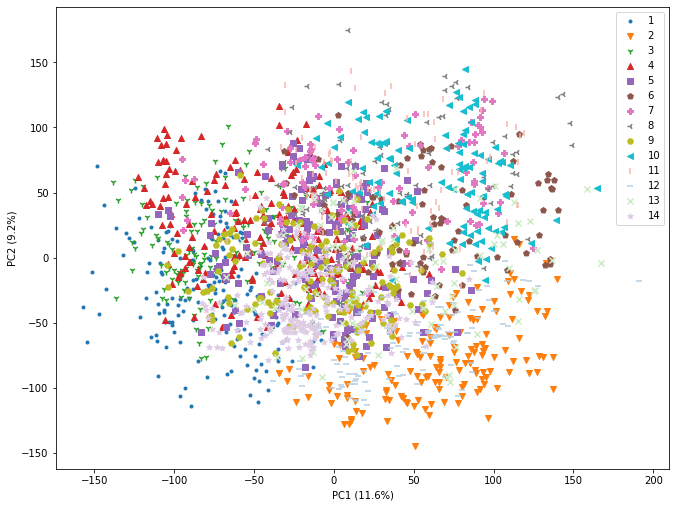

In [15]:
#apply the function to the dataset

plot_clusters( df, "Cluster14", scaling_mode = False)

From what one can see, the K means cluster method does not separate all 14 groups well. All 14 clusters seems to blend together, and no clear separation can be eye-balled.

(c) Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, cluster_labels, clusterer, pointlabels=None):
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [17]:
#your code here
#First select a fraction of the data

def frac(dataframe, fraction, other_info=None):
    """Returns fraction of data"""
    return dataframe.sample(frac=fraction)
df_frac=frac(df0, 0.1)
df_frac.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,...,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000
mean,3.527221,8.245763,51.299037,94.518571,-18.778986,49.260212,97.743006,-17.227866,45.932576,97.244493,...,-17.335696,44.734522,92.483281,-19.237405,44.653465,91.053678,-20.037140,43.643668,88.619613,-20.500872
std,1.330028,4.595137,34.373013,39.856509,34.604224,34.825490,38.084744,34.469909,36.179325,37.844750,...,35.280787,37.321421,40.430532,35.458445,38.000733,40.195465,35.075040,38.820959,40.338054,32.992447
min,1.000000,0.000000,-98.473308,-63.983172,-113.198099,-82.034933,-56.633315,-109.263294,-82.452400,-50.333850,...,-108.665197,-78.076844,-56.838722,-117.508295,-76.373142,-39.745367,-111.591390,-80.582651,-64.670648,-110.132664
25%,2.000000,5.000000,28.030243,75.174996,-43.420959,23.314332,79.449784,-42.058314,17.361416,81.315375,...,-43.246618,14.946347,73.669331,-46.824532,14.596208,69.059374,-47.470582,12.135832,64.693187,-45.301095
50%,4.000000,9.000000,54.799224,94.360763,-14.388515,52.944279,97.347512,-12.275634,50.782818,97.216222,...,-12.995806,49.725495,96.802319,-16.586109,48.722083,95.505751,-17.165048,49.112875,93.575336,-19.292266
75%,5.000000,12.000000,77.281899,131.673737,8.022006,76.232980,132.255093,8.454352,73.172889,131.597083,...,9.733545,73.082024,126.944346,8.808944,74.846291,123.829526,8.563396,74.030020,118.668102,5.600919
max,5.000000,14.000000,145.668811,168.886675,113.130660,145.989820,167.851377,104.589365,146.392846,167.374566,...,83.893787,144.016717,167.127478,104.461628,143.861074,167.888104,117.914907,184.122716,167.495408,106.454895


For n_clusters = 14, the average silhouette_score is 0.06948342889147312.


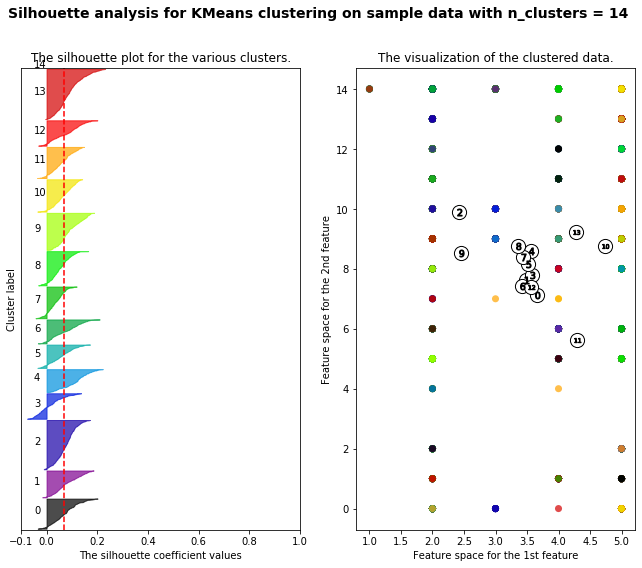

In [18]:
ms_kmeans = KMeans(n_clusters=14, init='random', n_init=46, random_state=109).fit(df_frac)  #kmeans on 10%of sample data
cluster_labels = ms_kmeans.labels_
silplot(df_frac.values, cluster_labels, ms_kmeans, pointlabels=None)

Overall, the silhouette chart tells the same result as the visulization above, but it provide more information:  - -- This clustering result is not ideal, all records can not be categorized well into 14 clusters. this can be confirmed by the snall average silhouette score (0.07). 
-- Most of the records' silhouette score is less than 0.2, and some have negative socres, indicating that they are falsely categorized to wrong clusters.
-- Cluster 5 and 8 are the clusters that are more well separated than others.


(d) Repeat all of the above steps, but attempting to group by posture rather than by user. That is : 

(i) Run the k-means algorithm with 5 centroids instead of 14, creating a variable named `Cluster5` and adding it to the dataset. 

(ii) Visualize the results for k-means. Does 5 clusters seem to make sense from this plot?

(iii) Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

In [19]:
#k-means algorithm with 5 centroids on original dataset df0
ms_kmeans2 = KMeans(n_clusters=5, init='random', n_init=46, random_state=109).fit(df0)   #


In [20]:
# add cluster lable back to dataset
df1=df0.copy()
df1["Cluster5"] =(ms_kmeans2.labels_) +1
df1.head()


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,Cluster5
0,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124,1
1,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553,5
2,1,0,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,24.523349,...,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279,4
3,2,0,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,...,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147,4
4,2,0,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,...,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243,2


your response here


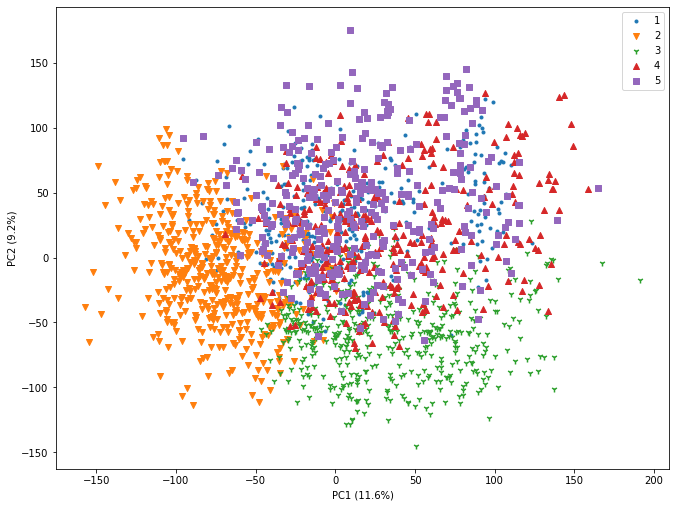

In [21]:
#Visualize the results for k-means.our code here
plot_clusters( df1, "Cluster5", scaling_mode = False)

The clustering results are still not ideal, but has been improved from the 14-clustering. Cluster 2 and 3 seems to be better separated from other clusters.

For n_clusters = 5, the average silhouette_score is 0.06633743525406424.


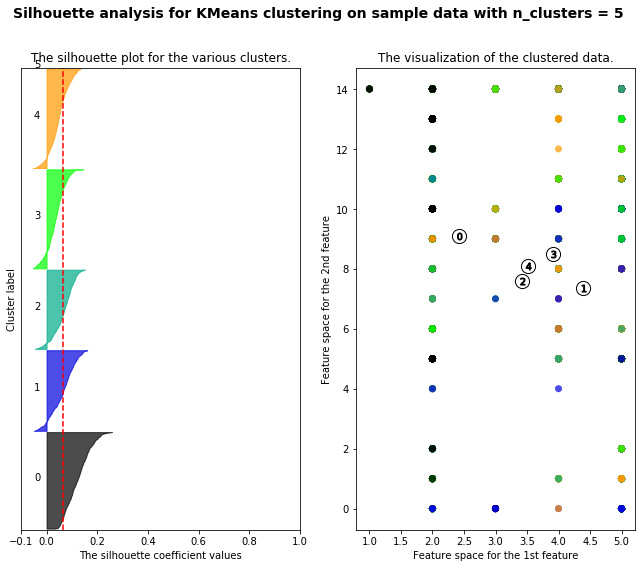

In [22]:
#Plot the silhouette scores on a 10% sample of the data
df1_frac=frac(df1, 0.1)

ms_kmeans_2 = KMeans(n_clusters=5, init='random', n_init=46, random_state=109).fit(df1_frac)
cluster_labels = ms_kmeans_2.labels_
silplot(df1_frac.values, cluster_labels, ms_kmeans_2, pointlabels=None)

The silhouette plot of 5-clusterung result indicate the same message: Having 5 clusters only slightly improved the segmentation results (avg silhouette score is 0.073 slightly higher than 0.071). The five clusters are still not clearly separate all points. Some clusters are better separated than others: cluster 2 and 3 are the ones that have more points with higher silhouette scores. We can observe that in the plot above.  




(e) What do the results suggest? Does this make sense in the context of what we know about the problem?

The overall performance of Kmeans clustering is not great, either 5 clusters or 14, while 5 clusters is slightly better. 
I find the result reasonable, as the data points collected are about 5 distinct hand postures, while some postures are more different from others and some are more similar. Hypothetically, cluster 2 or 3 may be the postures that natually more different from the other 3. 



<div class='exercise'> <b> Problem 2: Other Ks  </b> </div>

In the previous problem, we examined the results of running k-means with 5 and 14 centroids on the postures data. In this problem, we will investigate a broader range of possible cluster sizes, with a borader range of metrics. 

**For all of these questions, you should work with a sample of 2,000 data points drawn with `pd.sample` and a random seed of 109.**

(a) Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,15\}.$
 

In [23]:
#make sample data
df2=df0.sample(n=2000)
df2.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.530500,8.117500,51.472851,93.491865,-19.328365,49.841164,95.771119,-16.747464,45.410015,96.640652,...,-19.096088,46.026715,92.716641,-19.106900,45.785199,91.268371,-19.360504,43.634756,88.551220,-20.024265
std,1.322477,4.561918,33.958405,41.455051,35.071598,34.537959,38.594272,34.437696,36.385698,38.021928,...,36.152960,37.169973,39.659489,36.105489,37.458485,40.831895,34.560542,38.426767,40.377070,34.140558
min,2.000000,0.000000,-108.552738,-50.018194,-106.196863,-99.450227,-65.758453,-111.546813,-80.263737,-47.636393,...,-107.661783,-81.727461,-40.155605,-112.955271,-98.972964,-67.283707,-153.449813,-75.882622,-53.297744,-104.602522
25%,2.000000,5.000000,29.159815,71.972403,-43.977759,24.767292,77.819377,-40.151747,17.251998,81.484930,...,-46.374385,16.288136,74.203883,-47.157396,15.015634,70.828512,-46.881017,12.928310,62.629656,-45.868706
50%,4.000000,9.000000,54.513205,94.986729,-15.814959,54.530469,95.610425,-10.746431,49.476321,96.867837,...,-16.022587,50.616254,96.201014,-16.082982,49.923354,96.532197,-17.137408,46.460392,94.288562,-19.341982
75%,5.000000,12.000000,76.594316,130.705732,7.956737,75.588197,131.210414,9.237518,73.006870,130.046240,...,9.641730,74.194070,125.741123,9.103870,75.637874,122.660308,7.405706,74.075193,116.953827,6.841601
max,5.000000,14.000000,160.850926,168.216994,106.148019,133.116392,167.939356,84.353953,135.528235,165.869620,...,81.988277,146.085653,166.096491,104.258295,140.517179,166.691377,69.456513,146.408855,166.780295,110.030583


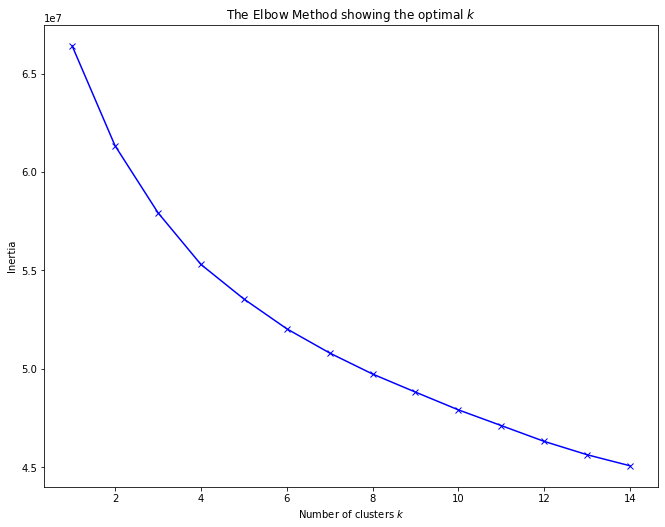

In [24]:
wss = []
for i in range(1,15):
    ms_kmeans = KMeans(n_clusters=i, init='random', n_init=46, random_state=109).fit(df2)
    wss.append(ms_kmeans.inertia_)
        
plt.figure(figsize=(11,8.5))
plt.plot(range(1,15), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

The first obvious bend occurs at 2 and another bend at 4. Two clusters may have lowest within cluster variance but it could not satisfy the need to further separate points.
It seems 4 clusters can be a good choice. 

(b) Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,15\}$. Plot the results. 

For n_clusters = 2, the average silhouette_score is 0.08153762175658245.
For n_clusters = 3, the average silhouette_score is 0.07190191601432652.
For n_clusters = 4, the average silhouette_score is 0.07202688782609053.
For n_clusters = 5, the average silhouette_score is 0.06916158954192346.
For n_clusters = 6, the average silhouette_score is 0.061358319147161354.
For n_clusters = 7, the average silhouette_score is 0.0625022757208806.
For n_clusters = 8, the average silhouette_score is 0.06476928522698802.
For n_clusters = 9, the average silhouette_score is 0.06875469824012094.
For n_clusters = 10, the average silhouette_score is 0.06661709659342704.
For n_clusters = 11, the average silhouette_score is 0.06871541841053623.
For n_clusters = 12, the average silhouette_score is 0.06829252854209637.
For n_clusters = 13, the average silhouette_score is 0.07141008781023798.
For n_clusters = 14, the average silhouette_score is 0.07124862894013988.
For n_clusters = 15, the average silhouette_sc

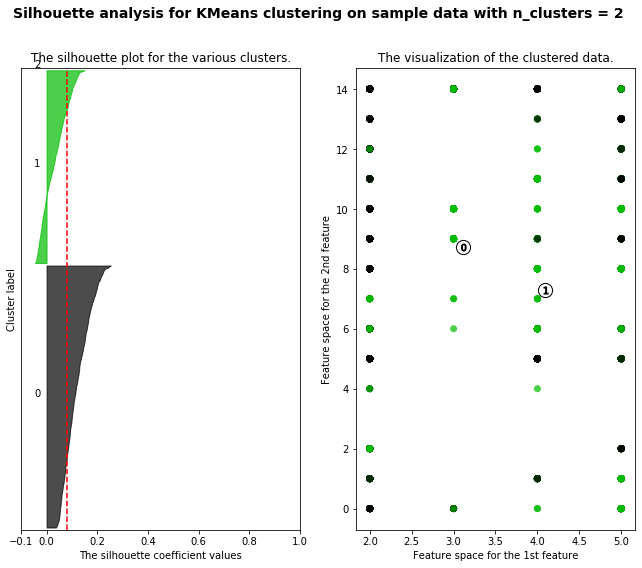

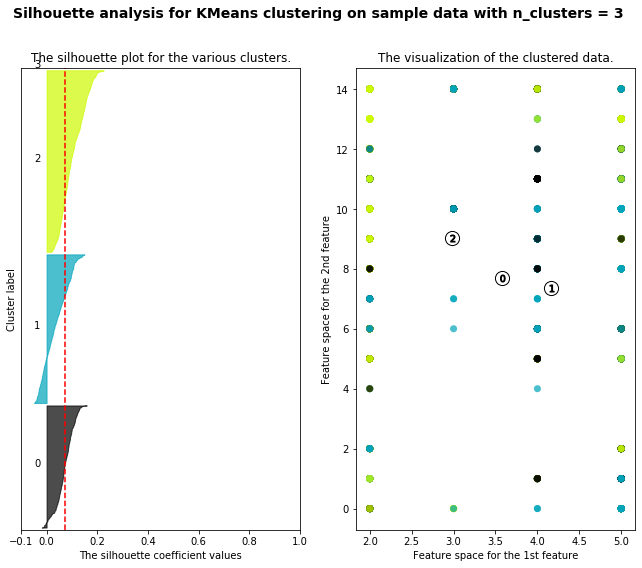

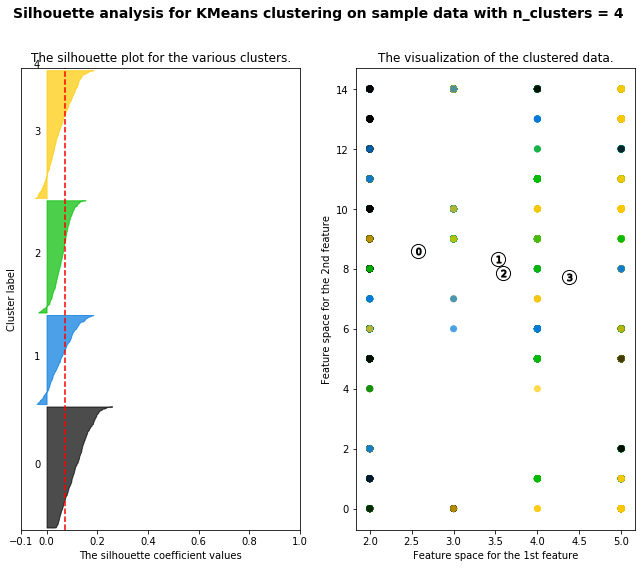

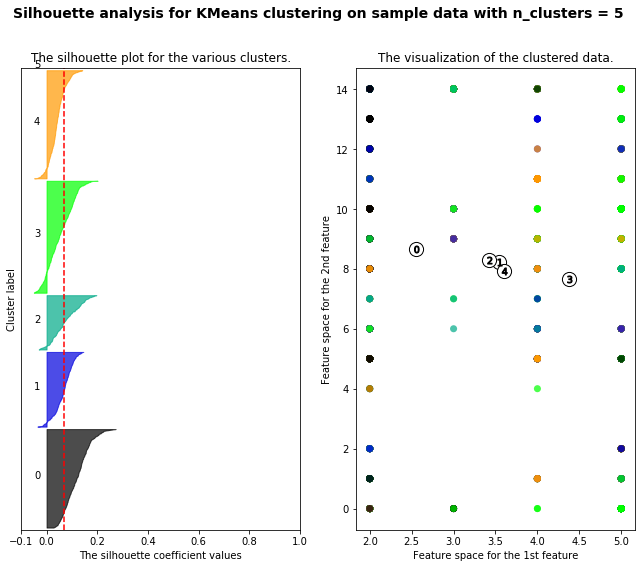

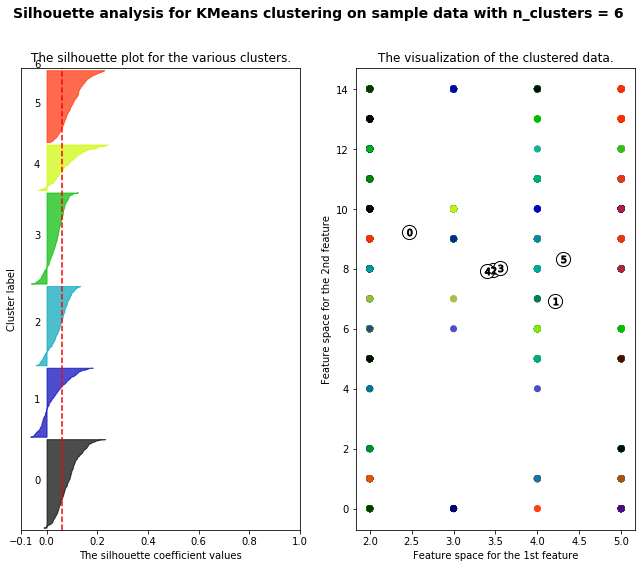

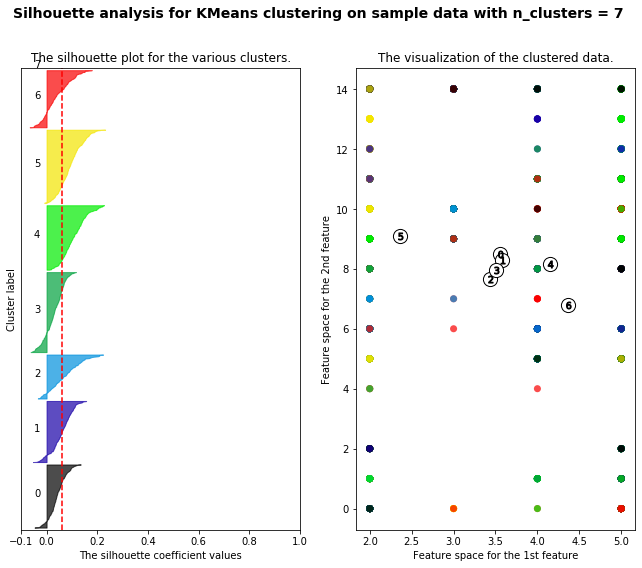

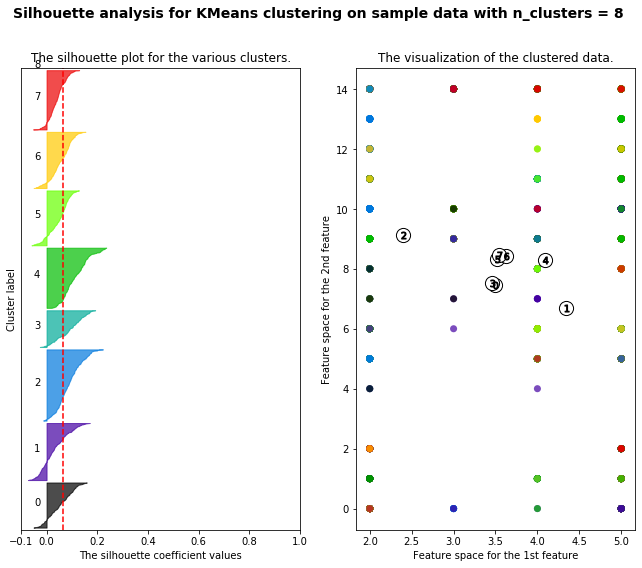

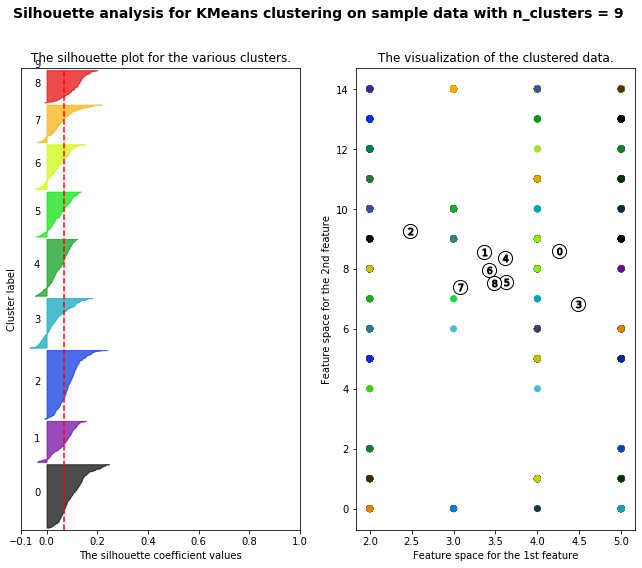

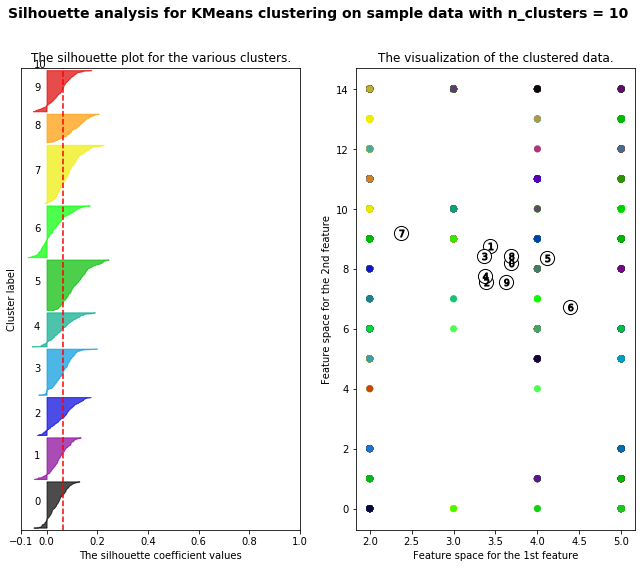

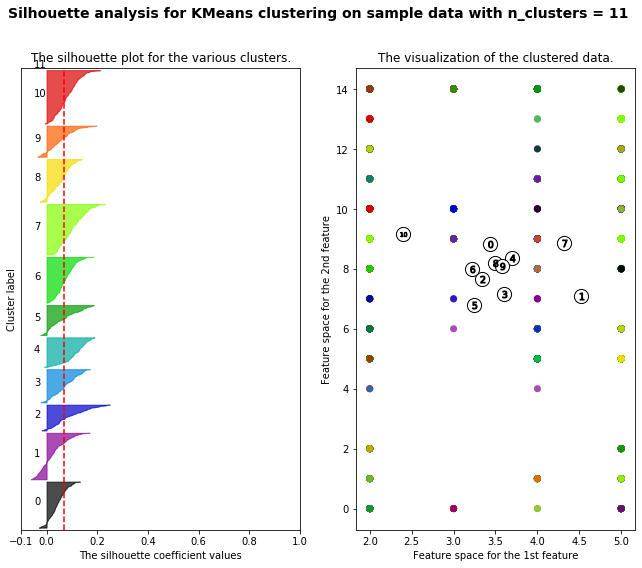

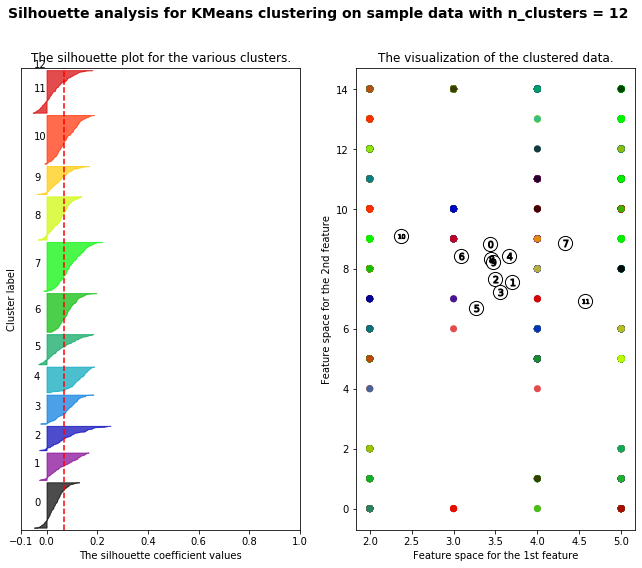

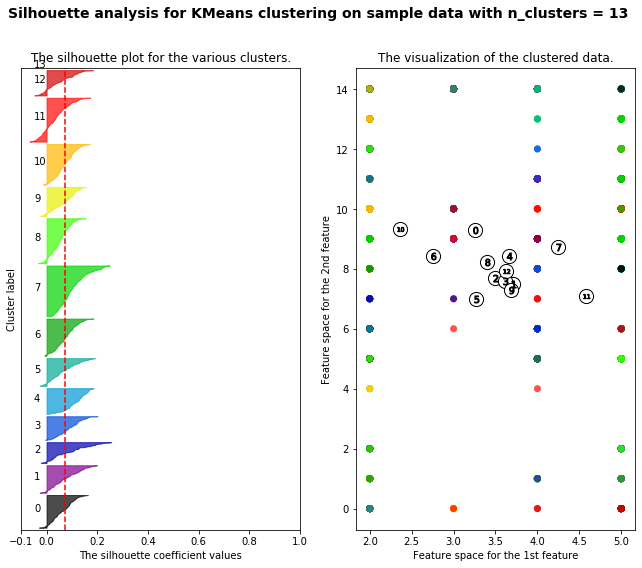

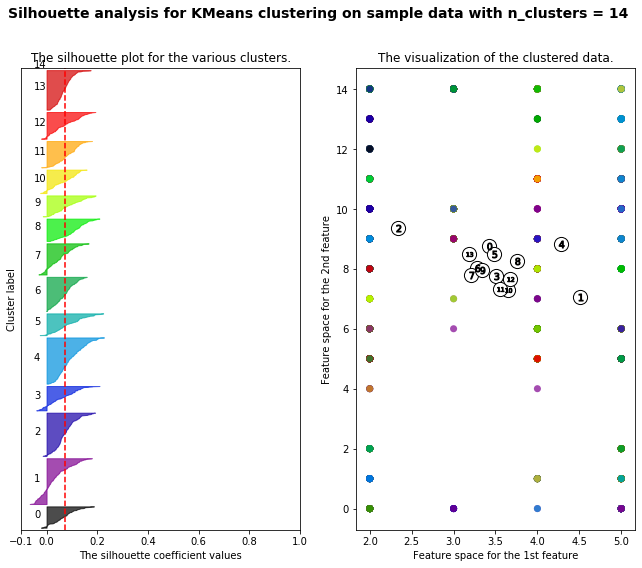

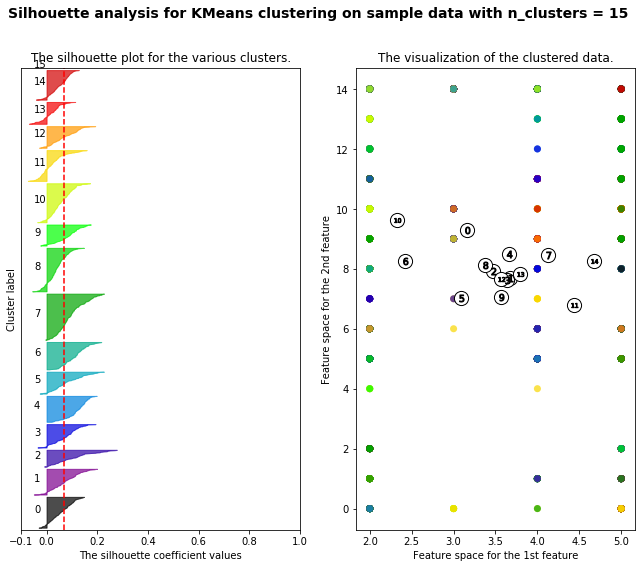

In [25]:
#use the average silhouette_score scores to evaluate choice of clusters on the 2000 sample points
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
     # Initialize the clusterer with n_clusters value and a random generator
     clusterer = KMeans(n_clusters, init='random', n_init=46, random_state=109).fit(df2)
     cluster_labels = clusterer.labels_
   
    ##plot the outcome
     silplot(df2.values, cluster_labels, clusterer, pointlabels=None)



(c) Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,15\}$. Plot the results. 

In [26]:
#gap statistics to select k
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs

gs_obj = OptimalK()

n_clusters = gs_obj(df2.values, n_refs=50, cluster_array=np.arange(1, 15))
print('Optimal clusters: ', n_clusters)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Optimal clusters:  14


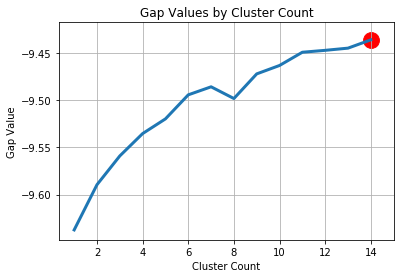

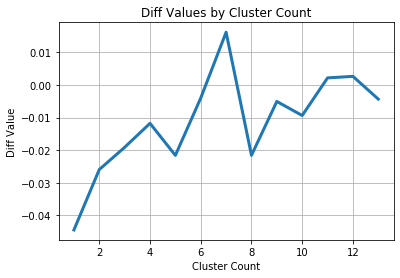

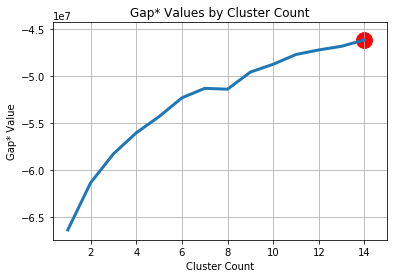

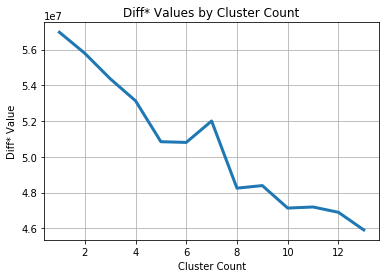

In [27]:
gs_obj.plot_results()

(d) After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

Let's summarize here:
elbow chart suggests 2 or 4
silhouette_score suggests the best choice is 2 or 4.
Gap statistics suggest 14 clusters

Due to the component of the data, i believe 4 clusters can be a good choice. 

<div class='exercise'> <b> Problem 3: Alternative Algorithms  </b> </div>

(e) Run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?  
*Note*: Do not use a sample of the data. Running the algorithm may take up to 5-10 minutes.

In [29]:
from sklearn.neighbors import NearestNeighbors

def plot_epsilon(df0, min_samples):

    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df0)
    distances, indices = fitted_neigbors.kneighbors(df0)
    
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)

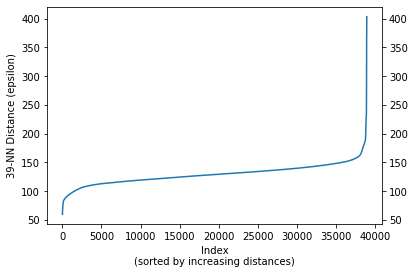

In [32]:
plot_epsilon(df0, 40)

The major slope occurs around eps=130 when min_samples set to 40.

In [39]:
## the best epislo is set 130.
##Compute DBSCAN
from sklearn import metrics

fitted_dbscan = DBSCAN(eps=130).fit(df0)
labels = fitted_dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[fitted_dbscan.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df0, labels))


Estimated number of clusters: 6
Estimated number of noise points: 642
Silhouette Coefficient: 0.039


The recommended cluster number is 6 and silhouette score is 0.039. The performance of DBSCAN is lower than the score of k means clustering.


(f) Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?

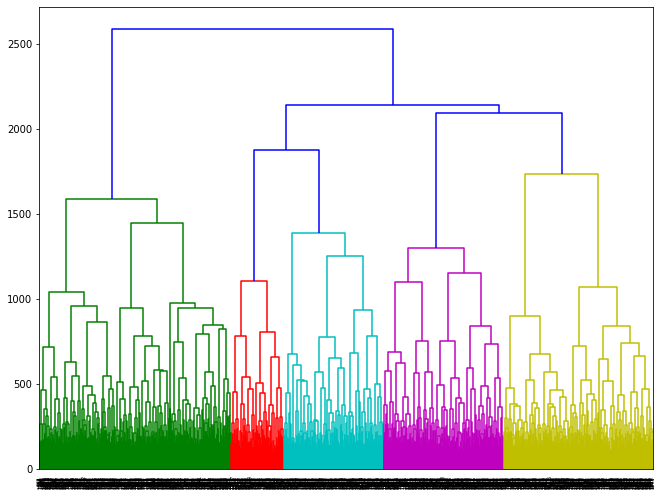

In [37]:
#Run hierachical clustering on the sample data (2000 records sample)
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(11,8.5))
dist_mat = pdist(df2, metric="euclidean")
ward_data = hac.ward(dist_mat)   ## ward's method

hac.dendrogram(ward_data);
plt.show()


your response here

In [9]:
#your code here


The agglomerative clustering suggest 5 clusters. 
Out of the 5 clusters, some cluters are more closer to each other in terms of distances. 

(g) Overall, what do you conclude about the number and kind of clusters in this data set?

your response here
